<a href="https://www.kaggle.com/code/dsagareeka/data-viz-of-top-grossing-movies?scriptVersionId=91280406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv


In [2]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[(0.37562649, 0.15974704, 0.41151182), (0.46073893, 0.17645017, 0.43417097), (0.54585987, 0.19467771, 0.44234111), (0.63329016, 0.21816454, 0.43555493), (0.71837612, 0.24102046, 0.41863486), (0.79876118, 0.27347974, 0.39064559), (0.85754536, 0.33574168, 0.36373567), (0.89260152, 0.42376366, 0.36526813), (0.910403, 0.51342591, 0.39932342), (0.92118373, 0.60184659, 0.45048789)]


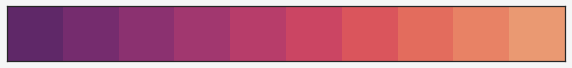

In [3]:
# set theme for seaborn


pattern=sns.color_palette("flare", 10)
pattern.reverse()

sns.set(style= 'white',palette = pattern,color_codes= True,rc={'axes.facecolor': "#f5f6f6", 'figure.facecolor':'#f5f6f6'})

sns.palplot(pattern) 

print(pattern)

In [4]:
# read Data

data = pd.read_csv("../input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv",index_col=0)

<h2 style="text-align:center;border-radius:5px;background-color:#534666;
           color:white;padding: 10px"> Knowing Data Variable </h2>

In [5]:
# print Column name
for col in data.columns:
    print(col)

Title
Movie Info
Distributor
Release Date
Domestic Sales (in $)
International Sales (in $)
World Sales (in $)
Genre
Movie Runtime
License


In [6]:
# Data dimension
data.shape

(918, 10)

In [7]:
# Data head

data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [8]:
# Data types

columntable = pd.DataFrame({"ColumnName": data.columns,
                          "DataType" : ["Qualitative","Qualitative","Qualitative","Quantative",
                                        "Quantative","Quantative","Quantative","Qualitative","Quantative","Qualitative"],
                           "SubDataType" : ["Nominal","Nominal","Nominal","Discrete & Ordinal",
                                        "Continuous ","Continuous ","Continuous ","Nominal","Continuous ","Nominal"]})
columntable

,ColumnName,DataType,SubDataType
0,Title,Qualitative,Nominal
1,Movie Info,Qualitative,Nominal
2,Distributor,Qualitative,Nominal
3,Release Date,Quantative,Discrete & Ordinal
4,Domestic Sales (in $),Quantative,Continuous
5,International Sales (in $),Quantative,Continuous
6,World Sales (in $),Quantative,Continuous
7,Genre,Qualitative,Nominal
8,Movie Runtime,Quantative,Continuous
9,License,Qualitative,Nominal


<h2 style="text-align:center;border-radius:5px;background-color:#534666;
           color:white;padding: 10px"> Understanding Data </h2>
    

In [9]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       918 non-null    object
 1   Movie Info                  918 non-null    object
 2   Distributor                 918 non-null    object
 3   Release Date                800 non-null    object
 4   Domestic Sales (in $)       918 non-null    int64 
 5   International Sales (in $)  918 non-null    int64 
 6   World Sales (in $)          918 non-null    int64 
 7   Genre                       918 non-null    object
 8   Movie Runtime               918 non-null    object
 9   License                     744 non-null    object
dtypes: int64(3), object(7)
memory usage: 78.9+ KB


In [10]:
# Data head

data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


<h2 style="text-align:center;border-radius:5px;background-color:#534666;
           color:white;padding: 10px"> Data Wrangling </h2> 

In [11]:
# Data Prep
## Extract year of movie release

data['Year'] = data['Title'].str[-5:-1]

## Convert Releasedate object to date

data["Release Date"]= pd.to_datetime(data["Release Date"])

## Extract release month and year

data['Release Month'] = data['Release Date'].apply(lambda x : x.month_name())
data['Release MonthYear']  = data['Release Date'].dt.strftime('%Y-%m-01')

## Convert movie runtime to numeric

data['hrs'] = data['Movie Runtime'].apply(lambda x : x.split()[0])
data['mins'] = data['Movie Runtime'].apply(lambda x : x.split()[2] if len(x.split()) > 2 else "0")

data['hrs'] = data['hrs'].astype('int64') 
data['mins'] = data['mins'].astype('int64')

data['Movie Runtime_hrs'] = data['hrs'] + data['mins']/60

# Convert Sales to Million

data['Domestic Sales Mn (in $)'] = data['Domestic Sales (in $)'] / (1000000)
data['International Sales Mn (in $)'] = data['International Sales (in $)'] / (1000000)
data['World Sales Mn (in $)'] = data['World Sales (in $)']/ (1000000)


In [12]:
data.head(3)

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year,Release Month,Release MonthYear,hrs,mins,Movie Runtime_hrs,Domestic Sales Mn (in $),International Sales Mn (in $),World Sales Mn (in $)
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015,December,2015-12-01,2,18,2.300000,936.662225,1132.859475,2069.521700
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019,April,2019-04-01,3,1,3.016667,858.373000,1939.128328,2797.501328
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009,December,2009-12-01,2,42,2.700000,760.507625,2086.738578,2847.246203


<h2 style="text-align:center;border-radius:5px;background-color:#534666;
           color:white;padding: 10px"> Summarise Data </h2>

In [13]:
# Count missing value

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = round(100 * df.isnull().sum() / len(df),2)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        return mz_table

missing_values_table(data)


,Missing Values,% of Total Values
Title,0,0.00
Movie Info,0,0.00
Distributor,0,0.00
Release Date,118,12.85
Domestic Sales (in $),0,0.00
International Sales (in $),0,0.00
World Sales (in $),0,0.00
Genre,0,0.00
Movie Runtime,0,0.00
License,174,18.95


In [14]:
# Count Unique values

cat_colu = data.select_dtypes(include=['object']).columns

def unique_value_table(df): 
    is_unique = data[cat_colu].apply(lambda x :  x.is_unique,  axis=0)
    unique_value = data[cat_colu].apply(lambda x :  x.nunique(),  axis=0)
    unique_per = data[cat_colu].apply(lambda x :  round(x.nunique()/len(x),2),  axis=0)
    
    unique_table = pd.concat([is_unique, unique_value, unique_per],axis=1)
    
    unique_table = unique_table.rename(columns = {0 :'is_unique', 1:'unique_value', 2:'unique_per%'})
    
    return(unique_table)
    
unique_value_table(data)   
    

,is_unique,unique_value,unique_per%
Title,True,918,1.00
Movie Info,True,918,1.00
Distributor,False,34,0.04
Genre,False,309,0.34
Movie Runtime,False,101,0.11
License,False,4,0.00
Year,False,52,0.06
Release Month,False,12,0.01
Release MonthYear,False,309,0.34


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Title                          918 non-null    object        
 1   Movie Info                     918 non-null    object        
 2   Distributor                    918 non-null    object        
 3   Release Date                   800 non-null    datetime64[ns]
 4   Domestic Sales (in $)          918 non-null    int64         
 5   International Sales (in $)     918 non-null    int64         
 6   World Sales (in $)             918 non-null    int64         
 7   Genre                          918 non-null    object        
 8   Movie Runtime                  918 non-null    object        
 9   License                        744 non-null    object        
 10  Year                           918 non-null    object        
 11  Release Month      

<h3 style="text-align:center;border-radius:5px;background-color:#534666;
           color:white;padding: 10px"> Exploratory Data Analysis </h2>

<h3 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Univariant Data Analysis </h3> 

In [16]:
# Function for column value count

def column_value_count(col):
    count =  col.value_counts()
    count_per = col.value_counts()/col.value_counts().sum()
    
    count_tab = pd.concat([count, count_per],axis=1)    
    count_tab.columns = ['count','count_per']
    
    count_tab.insert(0,'Column_value',count_tab.index)
    
    count_tab.reset_index(drop=True, inplace=True)
    
    return(count_tab)
    

<h4 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Movie Distributor Analysis </h3>

In [17]:
# Distributor
      
column_value_count(data['Distributor']).rename(columns={'Column_value':'Distributor'})


,Distributor,count,count_per
0,Warner Bros.,158,0.172113
1,Walt Disney Studios Motion Pictures,155,0.168845
2,Universal Pictures,119,0.129630
3,Twentieth Century Fox,117,0.127451
4,Sony Pictures Entertainment (SPE),101,0.110022
5,Paramount Pictures,99,0.107843
6,DreamWorks,21,0.022876
7,New Line Cinema,21,0.022876
8,Lionsgate,19,0.020697
9,DreamWorks Distribution,17,0.018519


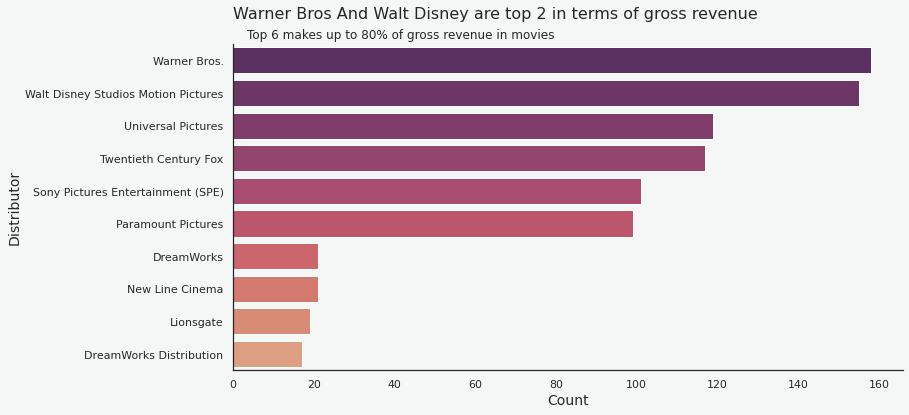

In [18]:
fig,ax = plt.subplots(1,figsize=(12,6))

sns.countplot(y=data['Distributor'],order = data['Distributor'].value_counts().iloc[:10].index,palette=pattern)

plt.xlabel("Count",fontsize= 14)
plt.ylabel("Distributor",fontsize= 14)

plt.title("Warner Bros And Walt Disney are top 2 in terms of gross revenue",fontsize = 16, loc='left',y=1.06)
plt.title("Top 6 makes up to 80% of gross revenue in movies",fontsize = 12,x=0.25) 

sns.despine()



<h4 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Movie Licence Analysis </h3>

In [19]:
column_value_count(data.License).rename(columns={'Column_value':'License'})

,License,count,count_per
0,PG-13,363,0.487903
1,R,194,0.260753
2,PG,173,0.232527
3,G,14,0.018817


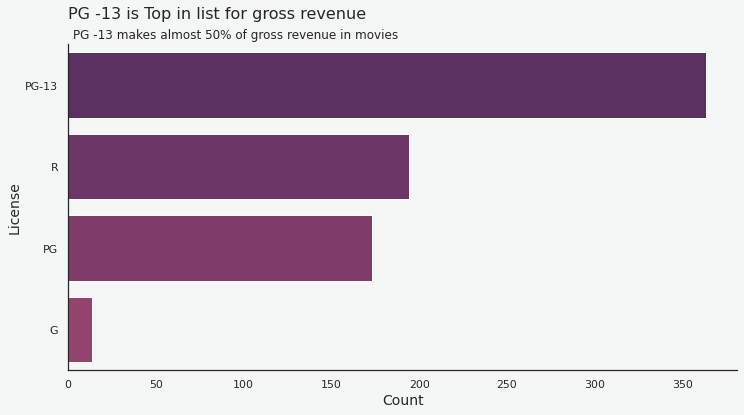

In [20]:
fig,ax = plt.subplots(1,figsize=(12,6))

sns.countplot(y=data.License,order = data.License.value_counts().index,palette=pattern)

plt.xlabel("Count",fontsize= 14)
plt.ylabel("License",fontsize= 14)

plt.title("PG -13 is Top in list for gross revenue",fontsize = 16, loc='left',y=1.06)
plt.title("PG -13 makes almost 50% of gross revenue in movies",fontsize = 12,x=0.25) 
 
sns.despine()

<h4 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Movie Release Date Analysis </h4>

In [21]:
Year_df= column_value_count(data['Year']).rename(columns={'Column_value':'Year'})

Year_df['Year']  = pd.to_datetime(Year_df['Year'])


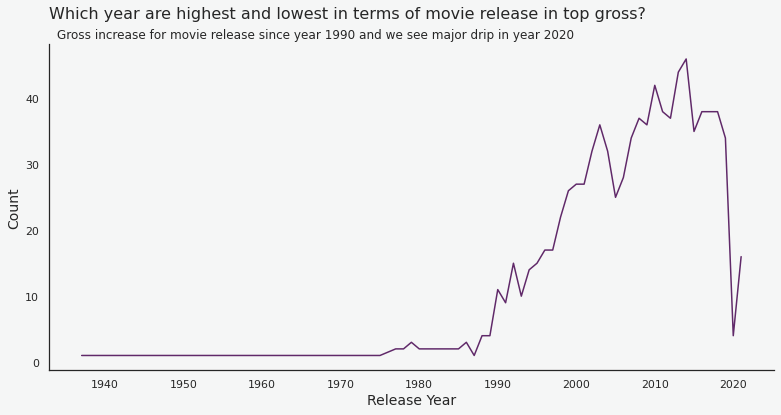

In [22]:
fig,ax = plt.subplots(1,figsize=(13,6)) 

sns.lineplot(x='Year',y='count',data= Year_df ) 

plt.xlabel("Release Year",fontsize= 14)
plt.ylabel("Count",fontsize= 14)

plt.title("Which year are highest and lowest in terms of movie release in top gross?",fontsize = 16, loc='left',y=1.06)
plt.title("Gross increase for movie release since year 1990 and we see major drip in year 2020 ",fontsize = 12, x=0.37) 
 
sns.despine()

<h3 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Movie Release Month Analysis </h3>

In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_df = column_value_count(data['Release Month']).rename(columns={'Column_value':'Release Month'})

month_df['Release Month'] = pd.Categorical(month_df['Release Month'], categories=month_order, ordered=True)
#month_df = month_df.set_index('Release Month')

month_df.sort_values(by='Release Month',inplace=True)
month_df

,Release Month,count,count_per
11,January,19,0.02375
8,February,40,0.05000
5,March,59,0.07375
9,April,34,0.04250
3,May,92,0.11500
0,June,124,0.15500
2,July,101,0.12625
6,August,50,0.06250
10,September,32,0.04000
7,October,48,0.06000


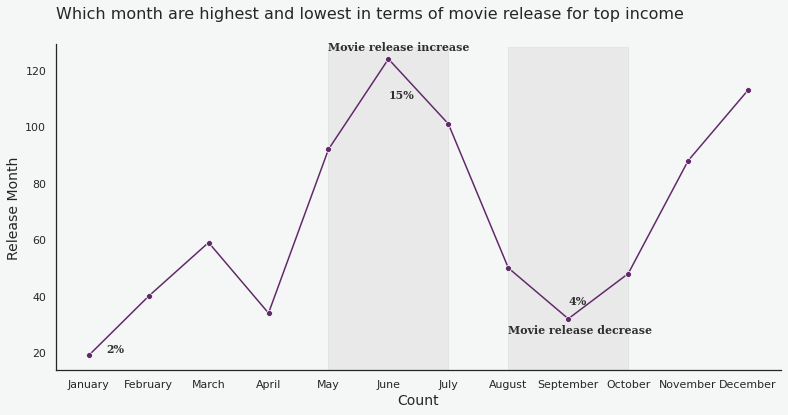

In [24]:
fig,ax = plt.subplots(1,figsize=(13,6)) 

sns.lineplot(x='Release Month',y='count',data= month_df , marker='o') 

plt.xlabel("Count",fontsize= 14)
plt.ylabel("Release Month",fontsize= 14)

ax.axvspan('May','July', color = 'grey',alpha = 0.1, ymax=0.99)
ax.text('May',127 , 'Movie release increase', {'font':'serif', 'fontsize': '11', 'color': 'black', 'weight':'bold'},alpha = 0.8)

ax.text('June',110 , '15%', {'font':'serif', 'fontsize': '11', 'color': 'black', 'weight':'bold'},alpha = 0.8)

ax.axvspan('August','October', color = 'grey',alpha = 0.1, ymax=0.99)
ax.text('August',27,'Movie release decrease', {'font':'serif', 'fontsize': '11', 'color': 'black', 'weight':'bold'},alpha = 0.8)

ax.text('September',37,'4%', {'font':'serif', 'fontsize': '11', 'color': 'black', 'weight':'bold'},alpha = 0.8)

ax.text(0.3,20,'2%', {'font':'serif', 'fontsize': '11', 'color': 'black', 'weight':'bold'},alpha = 0.8)


plt.title("Which month are highest and lowest in terms of movie release for top income",fontsize = 16, loc='left',y=1.06)
#plt.title("PG -13 makes almost 50% of gross revenue in movies",fontsize = 12,x=0.25) 
 
sns.despine()


<h4 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Movie Sales($) Analysis </h4>

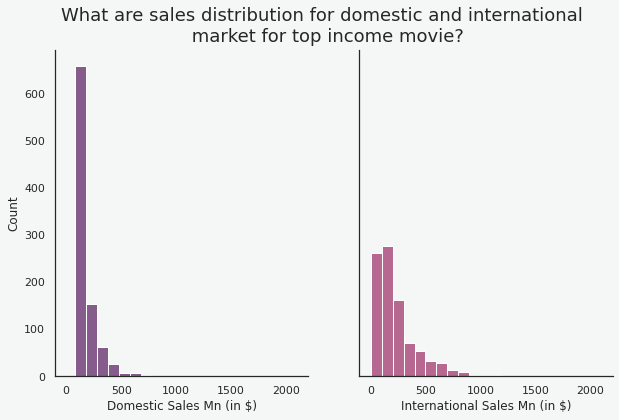

In [25]:
fig,axes = plt.subplots(1,2,figsize=(10,6),sharex=True,sharey=True) 

fig.suptitle("What are sales distribution for domestic and international \n market for top income movie?" ,fontsize= 18,
             x=0.5)

sns.histplot(ax=axes[0], x=data['Domestic Sales Mn (in $)'],binwidth=100,color=(0.37562649, 0.15974704, 0.41151182))
sns.histplot(ax=axes[1], x=data['International Sales Mn (in $)'],binwidth=100,color=(0.63329016, 0.21816454, 0.43555493))

sns.despine()

<h3 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Movie Runtime Analysis </h3>

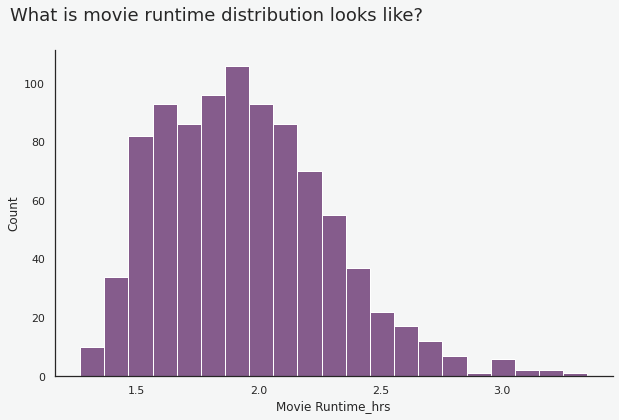

In [26]:
fig,axes = plt.subplots(1,figsize=(10,6)) 

fig.suptitle("What is movie runtime distribution looks like?" ,fontsize= 18,x=0.35)

sns.histplot(x=data['Movie Runtime_hrs'],color=(0.37562649, 0.15974704, 0.41151182))

sns.despine()

<h3 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Bivariant Data Analysis </h3> 

<h4 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Distributor Data Analysis vs other variable </h4> 

<h5 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Release Date </h5> 

In [27]:
year_dis_df = data[['Distributor','Year']].value_counts().reset_index()

year_dis_df.columns = ['Distributor','Year', 'n']

year_dis_df['Year']  = pd.to_datetime(year_dis_df['Year'])

year_dis_df = year_dis_df[year_dis_df.Year > '1990-01-01']



In [28]:
year_dis_df6 = data[['Distributor']].value_counts().reset_index()

year_dis_df6.columns = ['Distributor','n']


In [29]:
vec = set(year_dis_df6['Distributor'][:6])

custom_palette = {}

for q in year_dis_df6['Distributor']:
    #q = 'Warner Bros.'
    if q in vec :
        custom_palette[q] = (0.75861834, 0.25356035, 0.40663694)
    else:
        custom_palette[q] = 'grey'

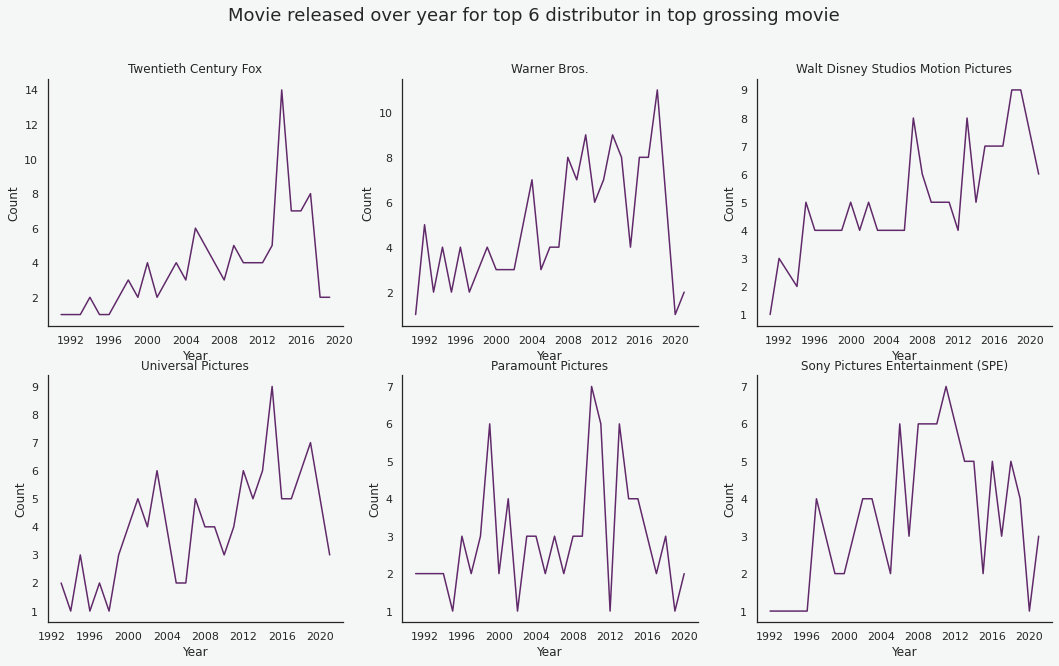

In [30]:
df =  year_dis_df[year_dis_df.Distributor.isin(vec)]

fig , ax = plt.subplots(2,3, figsize =(18,10))  

for col,ax,color in zip(df.Distributor.unique(),ax.ravel(),sns.color_palette("flare",6)):
    sns.lineplot(x='Year', y='n', data=df[df.Distributor==col],ax= ax,palette= (0.42355299, 0.16934709, 0.42581586))
    ax.set_title(col)
    ax.axes.set_ylabel("Count")
      
fig.suptitle("Movie released over year for top 6 distributor in top grossing movie", fontsize= 18)
 
sns.despine()


<h5 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Sales </h5> 

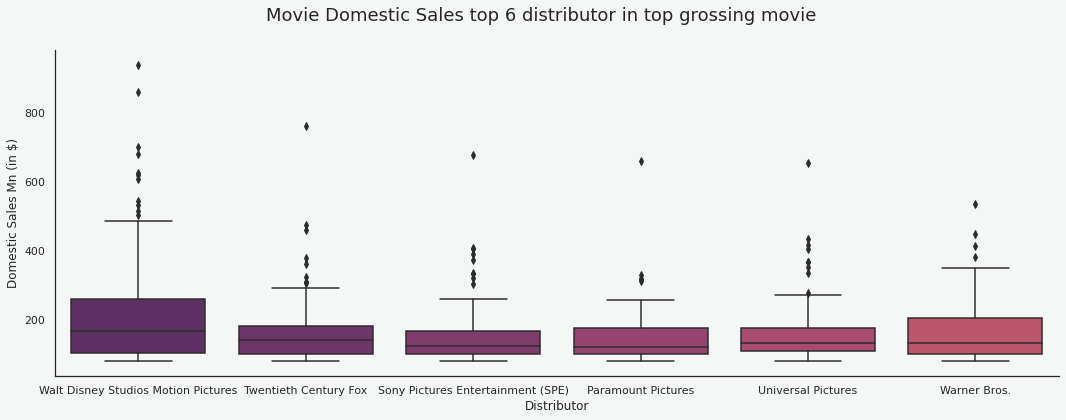

In [31]:
df_sales =  data[data.Distributor.isin(vec)]

fig , ax = plt.subplots(1, figsize =(18,6))  

sns.boxplot(x='Distributor', y='Domestic Sales Mn (in $)', data=df_sales)

      
fig.suptitle("Movie Domestic Sales top 6 distributor in top grossing movie", fontsize= 18)
 
sns.despine()

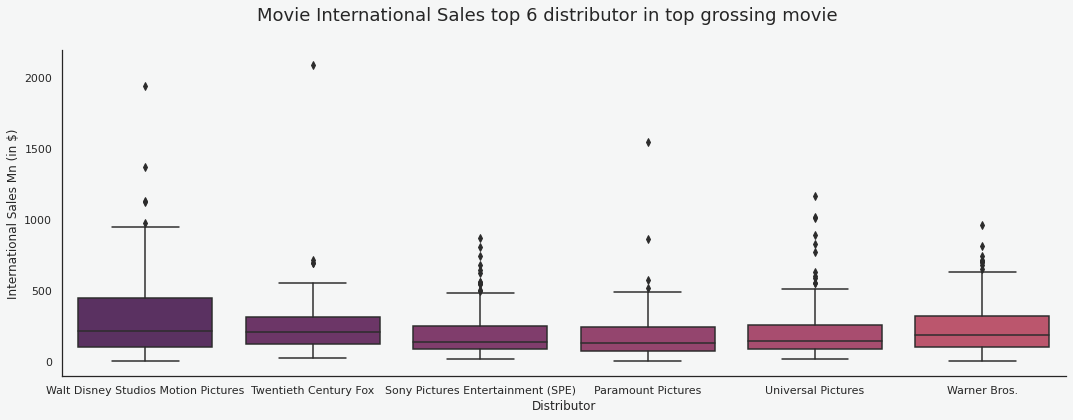

In [32]:
df_sales =  data[data.Distributor.isin(vec)]

fig , ax = plt.subplots(1, figsize =(18,6))  

sns.boxplot(x='Distributor', y='International Sales Mn (in $)', data=df_sales)

      
fig.suptitle("Movie International Sales top 6 distributor in top grossing movie", fontsize= 18)
 
sns.despine()

<h4 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Sales vs Movie Runtime </h4> 

<AxesSubplot:xlabel='Movie Runtime_hrs', ylabel='Domestic Sales Mn (in $)'>

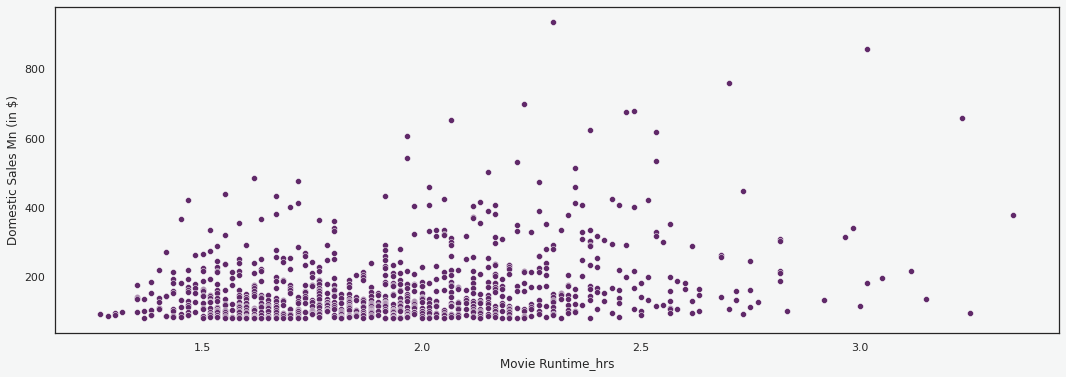

In [33]:
fig , ax = plt.subplots(1, figsize =(18,6))  

sns.scatterplot(y= data['Domestic Sales Mn (in $)'],x= data['Movie Runtime_hrs'])

<AxesSubplot:xlabel='Movie Runtime_hrs', ylabel='International Sales Mn (in $)'>

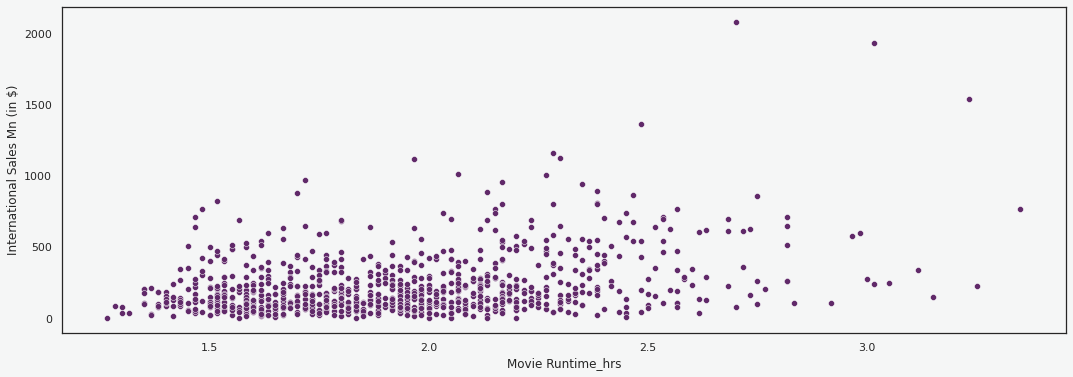

In [34]:
fig , ax = plt.subplots(1, figsize =(18,6))  

sns.scatterplot(x= data['Movie Runtime_hrs'], y= data['International Sales Mn (in $)'],)

<h3 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Movie Info Text Analysis </h3>  

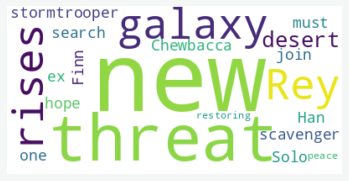

In [35]:
text = data['Movie Info'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud( background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

<h3 style="text-align:center;border-radius:5px;background-color:#83719d;
           color:white;padding: 10px"> Movie Info Text Analysis by Distributor </h3>  

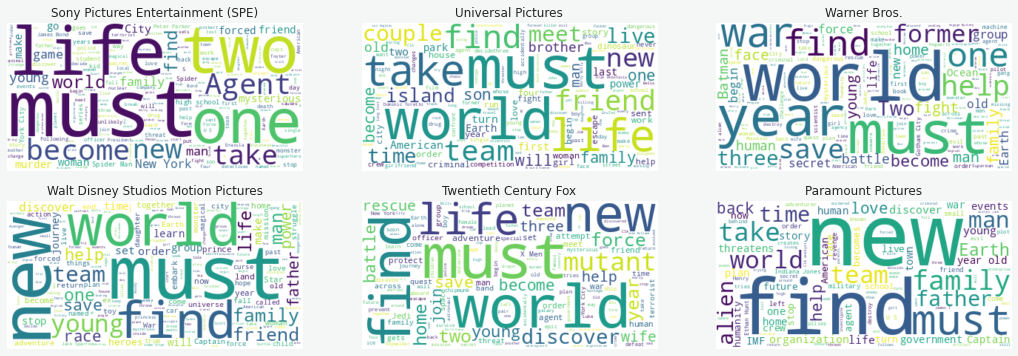

In [36]:
fix ,ax = plt.subplots(2,3,figsize= (18,6))

for col,ax in zip(vec ,ax.ravel()):
    
    text = " ".join(review for review in data.loc[data['Distributor'] == col,'Movie Info'])
    wordcloud = WordCloud( background_color="white").generate(text)
# Display the generated image:
    ax.axes.set_title(col)
    ax.imshow(wordcloud,interpolation='bilinear')
    ax.axis("off")
       